In [1]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dynamic_pricing.csv")

# Display the first 5 rows
df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [3]:
# Dataset shape
print("Dataset shape:", df.shape)

# Column names and data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Summary statistics
df.describe()


Dataset shape: (1000, 10)
Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object
Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64


,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [4]:
import seaborn as sns

# Histogram of ride cost
plt.figure(figsize=(8, 4))
sns.histplot(df["Historical_Cost_of_Ride"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Historical Cost of Ride")
plt.ylabel("Frequency")
plt.show()

NameError: name 'plt' is not defined

In [5]:
import matplotlib.pyplot as plt


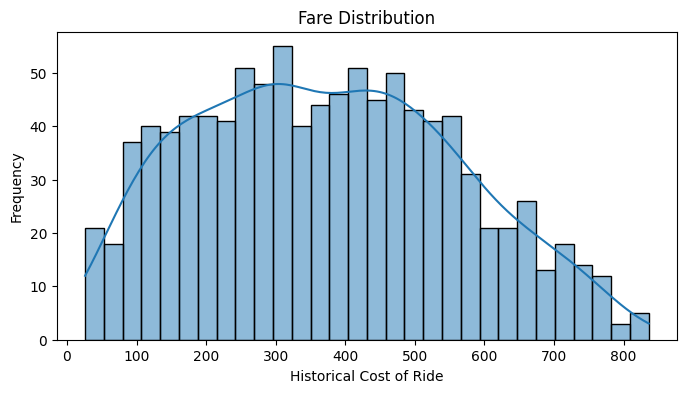

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt  # ✅ Make sure this is included

# Histogram of ride cost
plt.figure(figsize=(8, 4))
sns.histplot(df["Historical_Cost_of_Ride"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Historical Cost of Ride")
plt.ylabel("Frequency")
plt.show()


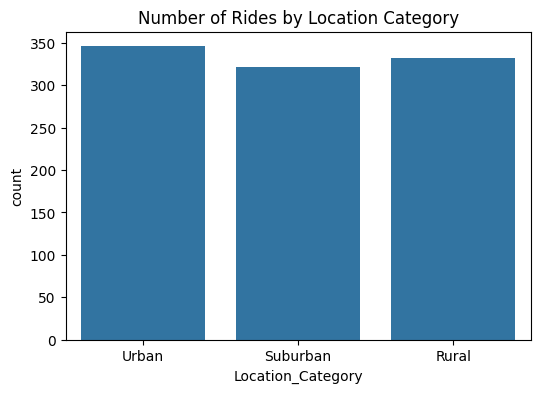

In [7]:
# Number of rides per Location Category
plt.figure(figsize=(6, 4))
sns.countplot(x="Location_Category", data=df)
plt.title("Number of Rides by Location Category")
plt.show()

In [8]:
# Average fare per vehicle type
vehicle_avg_fare = df.groupby("Vehicle_Type")["Historical_Cost_of_Ride"].mean()
print(vehicle_avg_fare)

Vehicle_Type
Economy    346.573399
Premium    396.246242
Name: Historical_Cost_of_Ride, dtype: float64


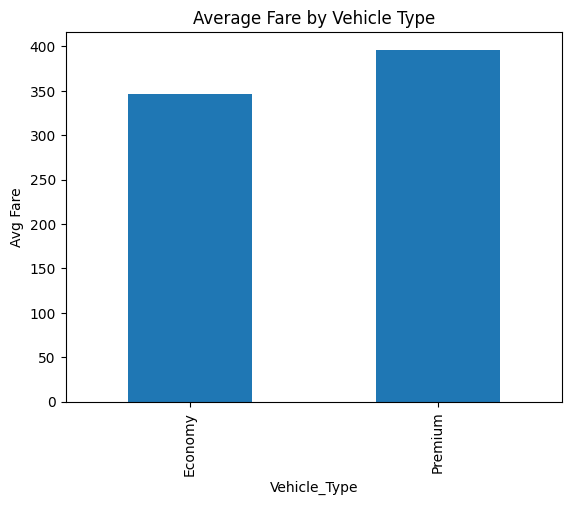

In [9]:
# Bar plot of average fare by vehicle type
vehicle_avg_fare.plot(kind="bar", title="Average Fare by Vehicle Type", ylabel="Avg Fare")
plt.show()

In [10]:
# Create a proxy feature for distance (assume average speed is 0.5 cost/min)
df["Estimated_Distance_km"] = df["Historical_Cost_of_Ride"] / df["Expected_Ride_Duration"]


In [11]:
# Show top 5 with new column
df[["Expected_Ride_Duration", "Historical_Cost_of_Ride", "Estimated_Distance_km"]].head()


,Expected_Ride_Duration,Historical_Cost_of_Ride,Estimated_Distance_km
0,90,284.257273,3.158414
1,43,173.874753,4.043599
2,76,329.795469,4.339414
3,134,470.201232,3.508964
4,149,579.681422,3.890479


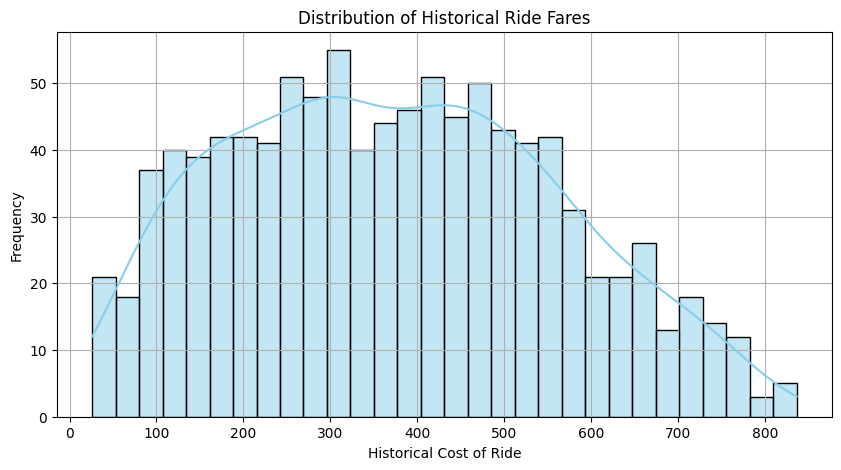

In [12]:
# Histogram: Fare Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Historical_Cost_of_Ride"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Historical Ride Fares")
plt.xlabel("Historical Cost of Ride")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


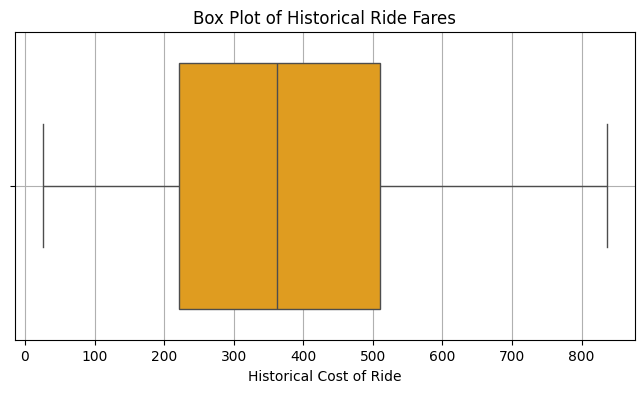

In [13]:
# Boxplot: Fare Spread and Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Historical_Cost_of_Ride"], color='orange')
plt.title("Box Plot of Historical Ride Fares")
plt.xlabel("Historical Cost of Ride")
plt.grid(True)
plt.show()


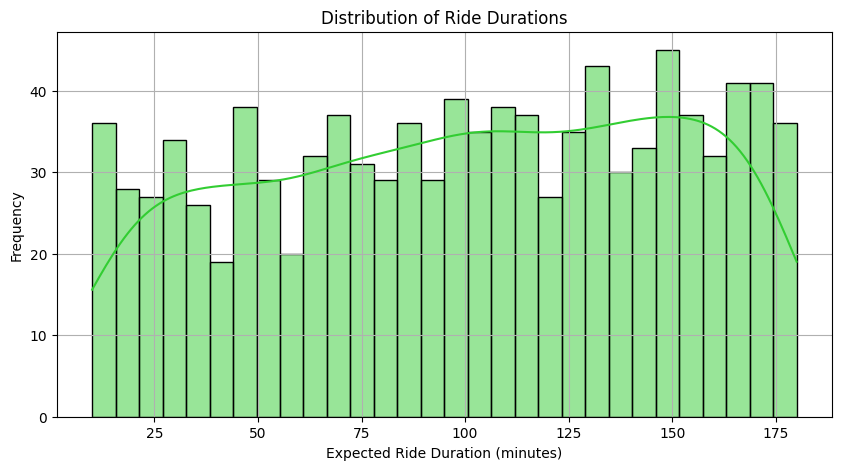

In [14]:
# Histogram of ride durations
plt.figure(figsize=(10, 5))
sns.histplot(df["Expected_Ride_Duration"], bins=30, kde=True, color='limegreen')
plt.title("Distribution of Ride Durations")
plt.xlabel("Expected Ride Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


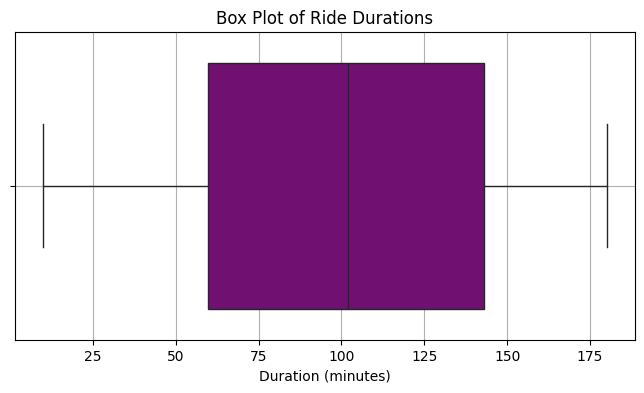

In [15]:
# Box plot of ride durations
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Expected_Ride_Duration"], color='purple')
plt.title("Box Plot of Ride Durations")
plt.xlabel("Duration (minutes)")
plt.grid(True)
plt.show()


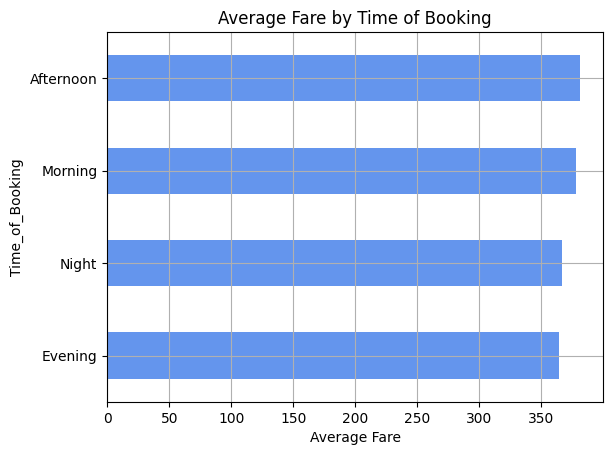

In [16]:
# Create a mapping for part of day to hour ranges (approximated)
time_map = {
    "Morning": 9,
    "Afternoon": 14,
    "Evening": 18,
    "Night": 22
}

df["Booking_Hour"] = df["Time_of_Booking"].map(time_map)

# Average fare per part of day
fare_by_time = df.groupby("Time_of_Booking")["Historical_Cost_of_Ride"].mean().sort_values()

# Bar Plot
fare_by_time.plot(kind='barh', color='cornflowerblue', title='Average Fare by Time of Booking')
plt.xlabel("Average Fare")
plt.grid(True)
plt.show()


C:\Users\Hey\AppData\Local\Temp\ipykernel_8372\611170740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Location_Category", data=df, palette="Set2")


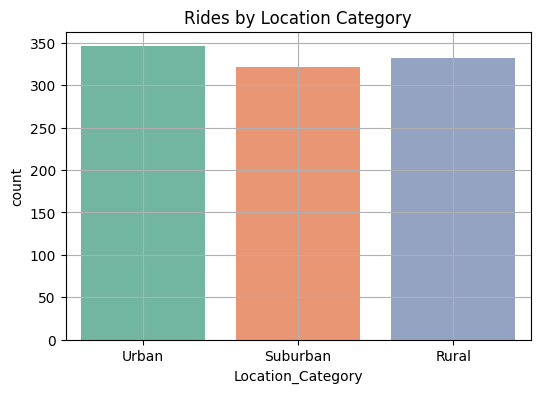

In [17]:
# Count rides by location category
plt.figure(figsize=(6, 4))
sns.countplot(x="Location_Category", data=df, palette="Set2")
plt.title("Rides by Location Category")
plt.grid(True)
plt.show()


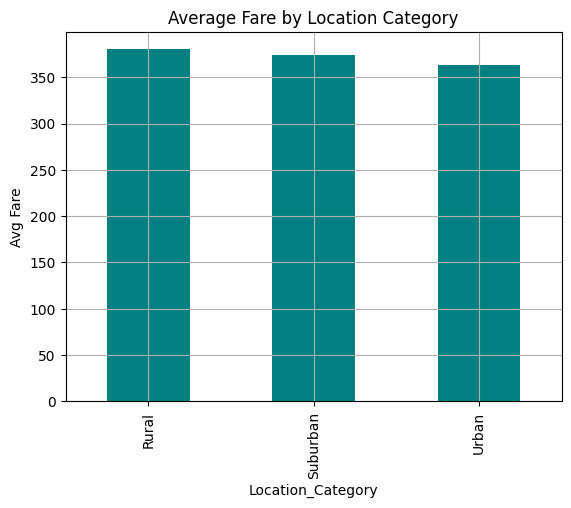

In [18]:

# Avg fare by location
loc_fare = df.groupby("Location_Category")["Historical_Cost_of_Ride"].mean()
loc_fare.plot(kind="bar", title="Average Fare by Location Category", color="teal")
plt.ylabel("Avg Fare")
plt.grid(True)
plt.show()

In [19]:
# Feature Engineering: Distance
df["Estimated_Distance_km"] = df["Historical_Cost_of_Ride"] / df["Expected_Ride_Duration"]


In [20]:
# Descriptive Statistics
desc_stats = df['Historical_Cost_of_Ride'].describe()
mode = df['Historical_Cost_of_Ride'].mode()[0]
iqr = desc_stats['75%'] - desc_stats['25%']
data_range = desc_stats['max'] - desc_stats['min']

print(f"""
🔍 Descriptive Statistics for Fare:
- Mean: {desc_stats['mean']:.2f}
- Median: {desc_stats['50%']:.2f}
- Mode: {mode:.2f}
- Std Dev: {desc_stats['std']:.2f}
- IQR (Q3 - Q1): {iqr:.2f}
- Range: {data_range:.2f}
""")



🔍 Descriptive Statistics for Fare:
- Mean: 372.50
- Median: 362.02
- Mode: 25.99
- Std Dev: 187.16
- IQR (Q3 - Q1): 289.13
- Range: 810.12



In [21]:
Q1 = df['Historical_Cost_of_Ride'].quantile(0.25)
Q3 = df['Historical_Cost_of_Ride'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Historical_Cost_of_Ride'] < Q1 - 1.5*IQR) | (df['Historical_Cost_of_Ride'] > Q3 + 1.5*IQR)]
print(f"🚨 Number of Outliers: {len(outliers)}")


🚨 Number of Outliers: 0


In [24]:
# Check if location columns exist
if 'Pickup_latitude' in df.columns and 'Pickup_longitude' in df.columns:
    import plotly.express as px
    fig = px.scatter_mapbox(
        df.sample(1000),
        lat="Pickup_latitude",
        lon="Pickup_longitude",
        hover_data=["Historical_Cost_of_Ride"],
        color="Historical_Cost_of_Ride",
        zoom=10,
        height=500
    )
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(title="Geographic Distribution of Rides")
    fig.show()


In [25]:
print(df.columns)

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride', 'Estimated_Distance_km', 'Booking_Hour'],
      dtype='object')


In [27]:
print(df['Time_of_Booking'].head(5))

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: Time_of_Booking, dtype: datetime64[ns]


In [28]:
print(df['Time_of_Booking'].astype(str).head(10))

0    NaT
1    NaT
2    NaT
3    NaT
4    NaT
5    NaT
6    NaT
7    NaT
8    NaT
9    NaT
Name: Time_of_Booking, dtype: object


In [29]:
print(df['Time_of_Booking'].unique())

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]


In [30]:
print(df['Time_of_Booking'].dropna().unique()[:10])

<DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]


In [31]:
print(df['Time_of_Booking'].dropna().unique()[:10])

<DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]


In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dynamic_pricing.csv")

In [33]:
df['Time_of_Booking'] = pd.to_datetime(df['Time_of_Booking'], format='...', errors='coerce')

In [34]:
# Look at the first 10 raw values BEFORE datetime conversion
print(df['Time_of_Booking'].head(10))


0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: Time_of_Booking, dtype: datetime64[ns]


In [35]:
print(df["Time_of_Booking"].head(10).to_list())

[NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT]


In [36]:
print("Missing values count:", df["Time_of_Booking"].isna().sum())

Missing values count: 1000


In [37]:
# For "2023-01-15 14:30:00"
df["Time_of_Booking"] = pd.to_datetime(df["Time_of_Booking"], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# For "15/01/2023 2:30 PM"
df["Time_of_Booking"] = pd.to_datetime(df["Time_of_Booking"], format='%d/%m/%Y %I:%M %p', errors='coerce')

In [38]:
# Reload raw data again freshly
df_raw = pd.read_csv("dynamic_pricing.csv")

# Print first few raw values from 'Time_of_Booking' BEFORE datetime conversion
print(df_raw["Time_of_Booking"].head(10).to_list())


['Night', 'Evening', 'Afternoon', 'Afternoon', 'Afternoon', 'Night', 'Afternoon', 'Afternoon', 'Evening', 'Night']


In [39]:
df["Time_of_Booking"] = df["Time_of_Booking"].astype("category")
print(df["Time_of_Booking"].value_counts())


Series([], Name: count, dtype: int64)


In [40]:
# Option 1: Label Encoding
df["Time_of_Booking_Code"] = df["Time_of_Booking"].cat.codes

# Option 2: One-Hot Encoding
df = pd.get_dummies(df, columns=["Time_of_Booking"], drop_first=True)


In [41]:
time_mapping = {
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3
}
df['Time_of_Booking_Code'] = df_raw['Time_of_Booking'].map(time_mapping)

In [43]:
time_ranges = {
'Morning': '06:00-12:00',
'Afternoon': '12:00-17:00',
'Evening': '17:00-21:00',
'Night': '21:00-06:00'
}

df_raw['Time_Range'] = df_raw['Time_of_Booking'].map(time_ranges)

In [44]:
# First create the mapping and apply it
time_mapping = {
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3
}
df_raw['Time_of_Booking_Code'] = df_raw['Time_of_Booking'].map(time_mapping)

# Now you can view both columns
print(df_raw[['Time_of_Booking', 'Time_of_Booking_Code']].head())

  Time_of_Booking  Time_of_Booking_Code
0           Night                     3
1         Evening                     2
2       Afternoon                     1
3       Afternoon                     1
4       Afternoon                     1


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average fare by Time_of_Booking
plt.figure(figsize=(8, 5))
sns.barplot(x='Time_of_Booking', y='fare_amount', data=df_raw, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Average Fare by Time of Booking')
plt.xlabel('Time of Booking')
plt.ylabel('Average Fare ($)')
plt.show()


ValueError: Could not interpret value `fare_amount` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [46]:
print(df_raw.columns.tolist())

['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride', 'Time_Range', 'Time_of_Booking_Code']


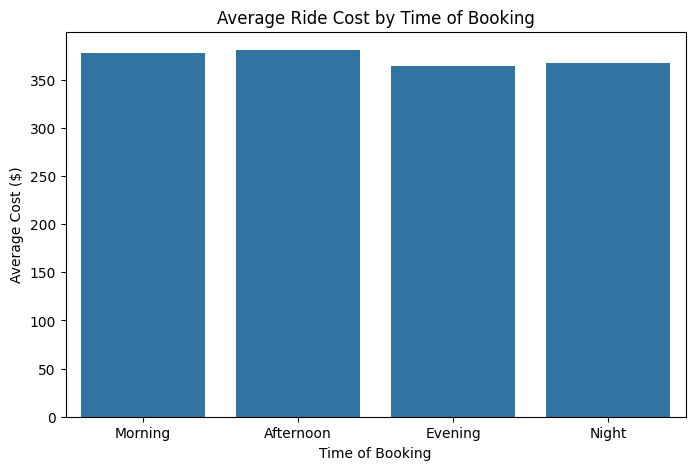

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# OPTIONAL: Rename the column if you prefer working with 'fare_amount'
df_raw.rename(columns={'Historical_Cost_of_Ride': 'fare_amount'}, inplace=True)

# Create the visualization
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Time_of_Booking', 
    y='fare_amount',  # Now using the renamed column
    data=df_raw,
    order=['Morning', 'Afternoon', 'Evening', 'Night'],
    estimator='mean',
    errorbar=None
)
plt.title('Average Ride Cost by Time of Booking')
plt.xlabel('Time of Booking')
plt.ylabel('Average Cost ($)')
plt.show()

<Axes: xlabel='Time_of_Booking', ylabel='fare_amount'>

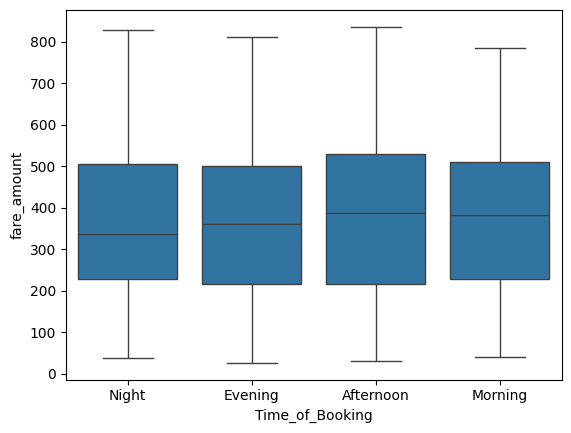

In [48]:
sns.boxplot(x='Time_of_Booking', y='fare_amount', data=df_raw)


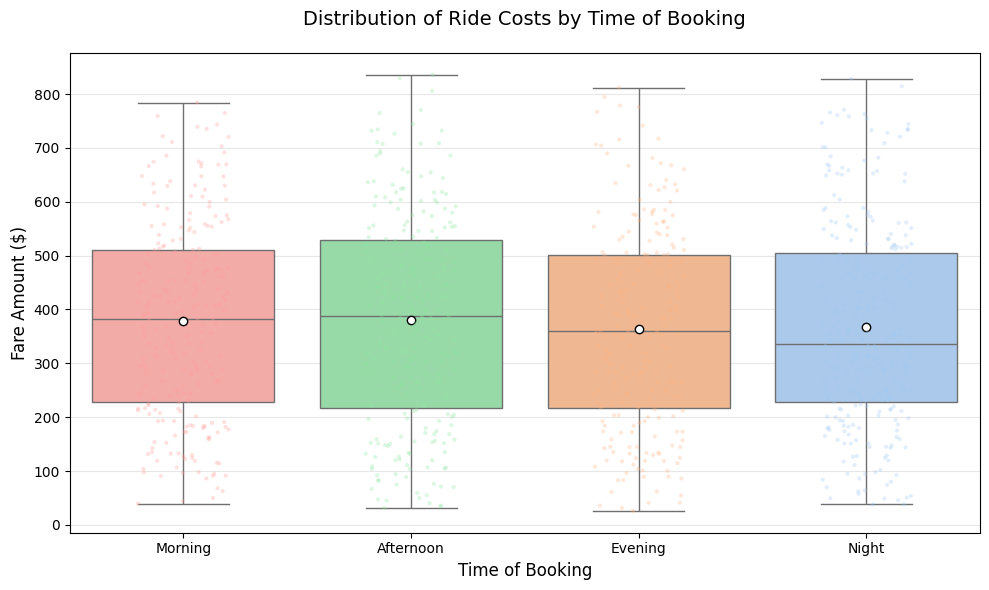

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create the boxplot with corrected palette usage
sns.boxplot(
    x='Time_of_Booking',
    y='fare_amount',
    hue='Time_of_Booking',  # Added to properly use palette
    data=df_raw,
    order=['Morning', 'Afternoon', 'Evening', 'Night'],
    palette='pastel',
    showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'},
    legend=False  # Avoid duplicate legend
)

# Add plot enhancements
plt.title('Distribution of Ride Costs by Time of Booking', pad=20, fontsize=14)
plt.xlabel('Time of Booking', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Rotate x-axis labels if needed
plt.xticks(rotation=45 if len(df_raw['Time_of_Booking'].unique()) > 4 else 0)

# Add data points with jitter (now color matches boxplot)
sns.stripplot(
    x='Time_of_Booking',
    y='fare_amount',
    hue='Time_of_Booking',  # Added for consistency
    data=df_raw,
    palette='pastel',
    alpha=0.3,
    jitter=0.2,
    size=3,
    legend=False
)

plt.tight_layout()
plt.show()